This is a data science project is to target those Credit card customers which are gonna get churned. The problem here is finding those customers that are gonna be churned to provide better service to them. Getting a high recall value is critical, as finding non churned customers is not an issue, but not being able to find churned customers will be.

Dataset imported from Kaggle : https://www.kaggle.com/sakshigoyal7/credit-card-customers/tasks?taskId=2729

## Import all libraries

In [280]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

from scipy import stats
from scipy.stats import norm

from sklearn.preprocessing import LabelEncoder

import math
import warnings

import xgboost as xgb
import lightgbm as lgb


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate, learning_curve
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [281]:
plt.style.use('ggplot')
warnings.filterwarnings('ignore')

## Lets read in the dataset now  

In [282]:
dataframe= pd.read_csv("C:\\Users\\User\\Documents\\Projects\\CreditCardChurn\\BankChurners.csv")

print(dataframe.shape)
# Look at 10 random samples in the dataframe 
dataframe.sample(10)

(10127, 23)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
10043,719900733,Existing Customer,60,M,1,High School,Married,$40K - $60K,Blue,47,...,9805.0,1007,8798.0,0.800,14641,95,0.900,0.103,0.000085,0.999920
5618,817332483,Attrited Customer,63,M,0,Doctorate,Single,Unknown,Blue,47,...,7306.0,0,7306.0,0.875,2445,43,0.593,0.000,0.997800,0.002197
6715,711237633,Attrited Customer,49,M,0,Graduate,Married,$60K - $80K,Blue,29,...,1460.0,0,1460.0,0.738,2329,36,0.500,0.000,0.996160,0.003836
9329,715832058,Existing Customer,40,F,5,Graduate,Unknown,Less than $40K,Blue,36,...,4512.0,1172,3340.0,0.706,14414,98,0.815,0.260,0.000198,0.999800
7653,767958933,Existing Customer,40,M,4,College,Married,$40K - $60K,Silver,34,...,15471.0,1291,14180.0,0.651,3993,77,0.674,0.083,0.000063,0.999940
5951,708338958,Existing Customer,58,F,1,Graduate,Single,Less than $40K,Blue,36,...,3173.0,1713,1460.0,0.609,3797,75,0.786,0.540,0.000031,0.999970
7272,715197633,Existing Customer,43,M,3,Uneducated,Unknown,$40K - $60K,Blue,38,...,9449.0,1914,7535.0,0.870,4658,93,0.722,0.203,0.000232,0.999770
6386,710382108,Existing Customer,39,F,3,Post-Graduate,Married,Less than $40K,Blue,19,...,2452.0,2423,29.0,0.778,4204,63,0.800,0.988,0.000067,0.999930
1206,775198608,Existing Customer,38,F,2,Graduate,Married,Less than $40K,Blue,32,...,4429.0,0,4429.0,1.065,1970,40,0.818,0.000,0.000303,0.999700
8839,719918358,Existing Customer,57,F,3,Graduate,Unknown,Less than $40K,Blue,36,...,3082.0,2507,575.0,0.687,7787,89,0.508,0.813,0.000071,0.999930


In [283]:
dataframe.drop(["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
                "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"],
               axis=1, inplace= True)

# we don't need the unique id's
dataframe.drop("CLIENTNUM", axis =1, inplace= True)

display(dataframe.shape)

(10127, 20)

In [284]:
#Check if there are any null values
dataframe.isnull().values.any()

False

In [285]:
# checking for different dtypes 
display(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

None

In [286]:
# checking the descriptive stats for the dataframe
display(dataframe.describe())

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


We have 10127 observations and 20 features in the dataframe. Our target column is Attrition_Flag (which is binary). Suprisingly we don't have any missing values, which is a good news. The dataset mainly consists of numerical data. 

## Exploring the Data

Categorical Features <br>
- Attrition_Flag (1: Existing Customer, 0: Attrited Customer): The Customer leaves or not <br>
- Gender (1: Male, 0: Female) <br>
- Education_Level (Graduate , High School, Unknown, Uneducated, College, Post-Graduate, Doctorate)<br>
- Marital_Status (Married, Single, Unknown, Divorced) <br>
- Income_Category (Less than 40K, 40K - 60K, 80K - 120K, 60K - 80K, Unknown, 120K +) in dollar <br>
- Card_Category (Blue, Silver, Gold, Platinum) <br>

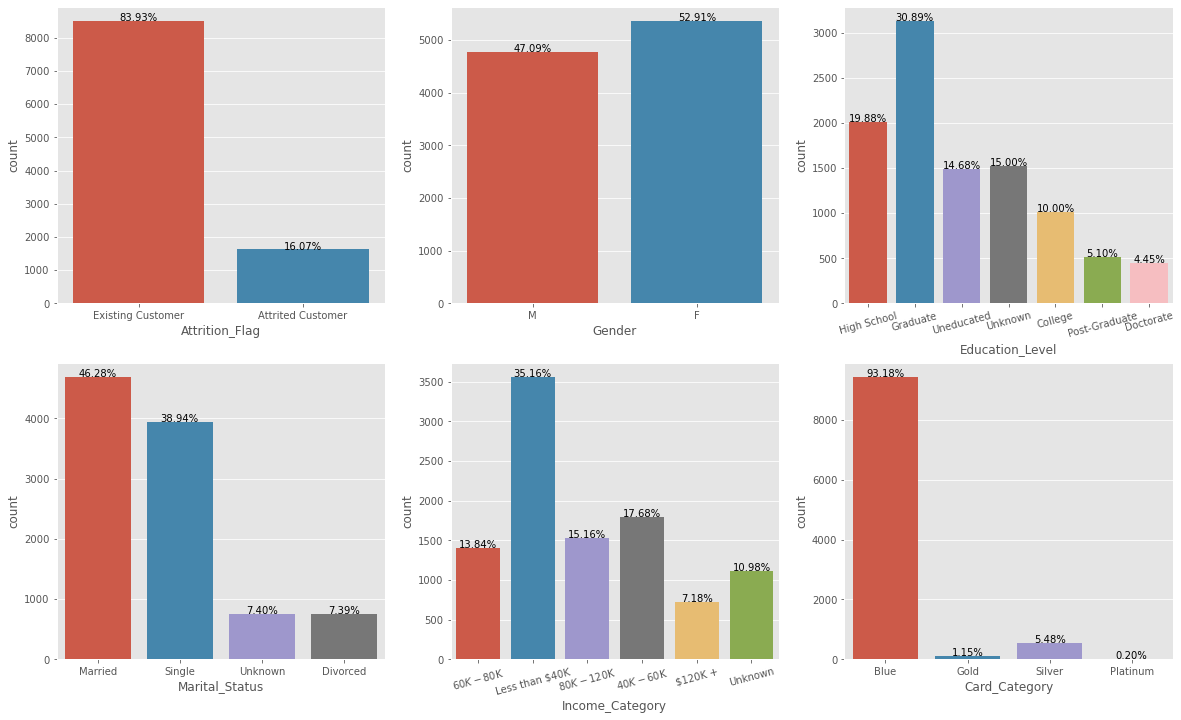

In [287]:
categorical= [ "Attrition_Flag", "Gender", "Education_Level", "Marital_Status", "Income_Category", "Card_Category" ]
def plotcat(categorical,target):
    fig,axis= plt.subplots(len(categorical) // 3,3, figsize=(20,12))
    index =0

    for i in range (len(categorical) // 3):
        for j in range (3):
            ax = sns.countplot(categorical[index],data=dataframe,hue=target,ax=axis[i][j])
            if target== "Attrition_Flag":
                ax.legend(title="Exisiting Customer?",loc='upper right',labels=["Yes","No"], title_fontsize=7, fontsize=7)
                
            if categorical[index] in ["Education_Level","Income_Category"]:
                for item in ax.get_xticklabels():
                    item.set_rotation(15)
        
            for p in ax.patches:
                height=p.get_height()
                ax.text(p.get_x()+p.get_width()/2,height+3,'{:1.2f}%'.format(height/len(dataframe)*100),ha="center")
            index+=1
plotcat(categorical,None)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


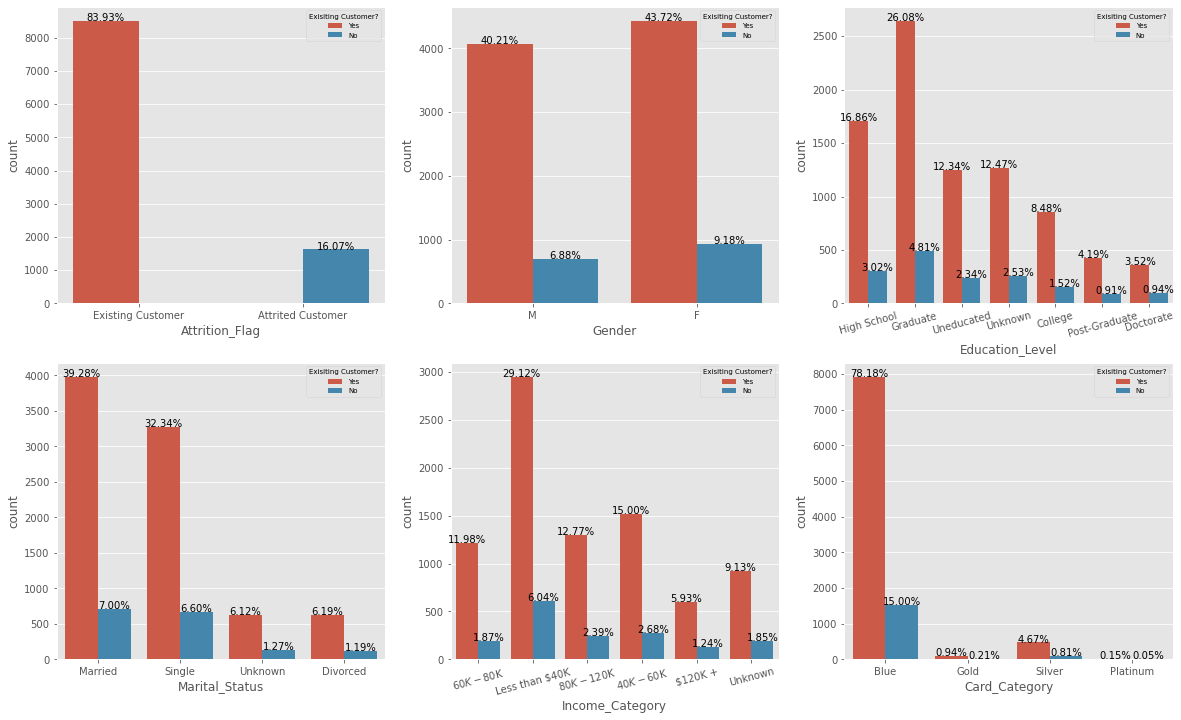

In [288]:
plotcat(categorical,"Attrition_Flag")

Numerical Features <br>
- Customer_Age: Customer's Age in Years <br>
- Dependent_count: Number of dependents <br>
- Months_on_book: Period of relationship with bank <br>
- Total_Relationship_Count: Total no. of products held by the customer <br>
- Months_Inactive_12_mon: No. of months inactive in the last 12 months <br>
- Contacts_Count_12_mon: No. of Contacts in the last 12 months <br>
- Credit_Limit: Credit Limit on the Credit Card <br>
- Total_Revolving_Bal: Total Revolving Balance on the Credit Card <br>
- Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months) <br>
- Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1) <br>
- Total_Trans_Amt: Total Transaction Amount (Last 12 months) <br>
- Total_Trans_Ct: Total Transaction Count (Last 12 months) <br>
- Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1) <br>
- Avg_Utilization_Ratio: Average Card Utilization Ratio <br>

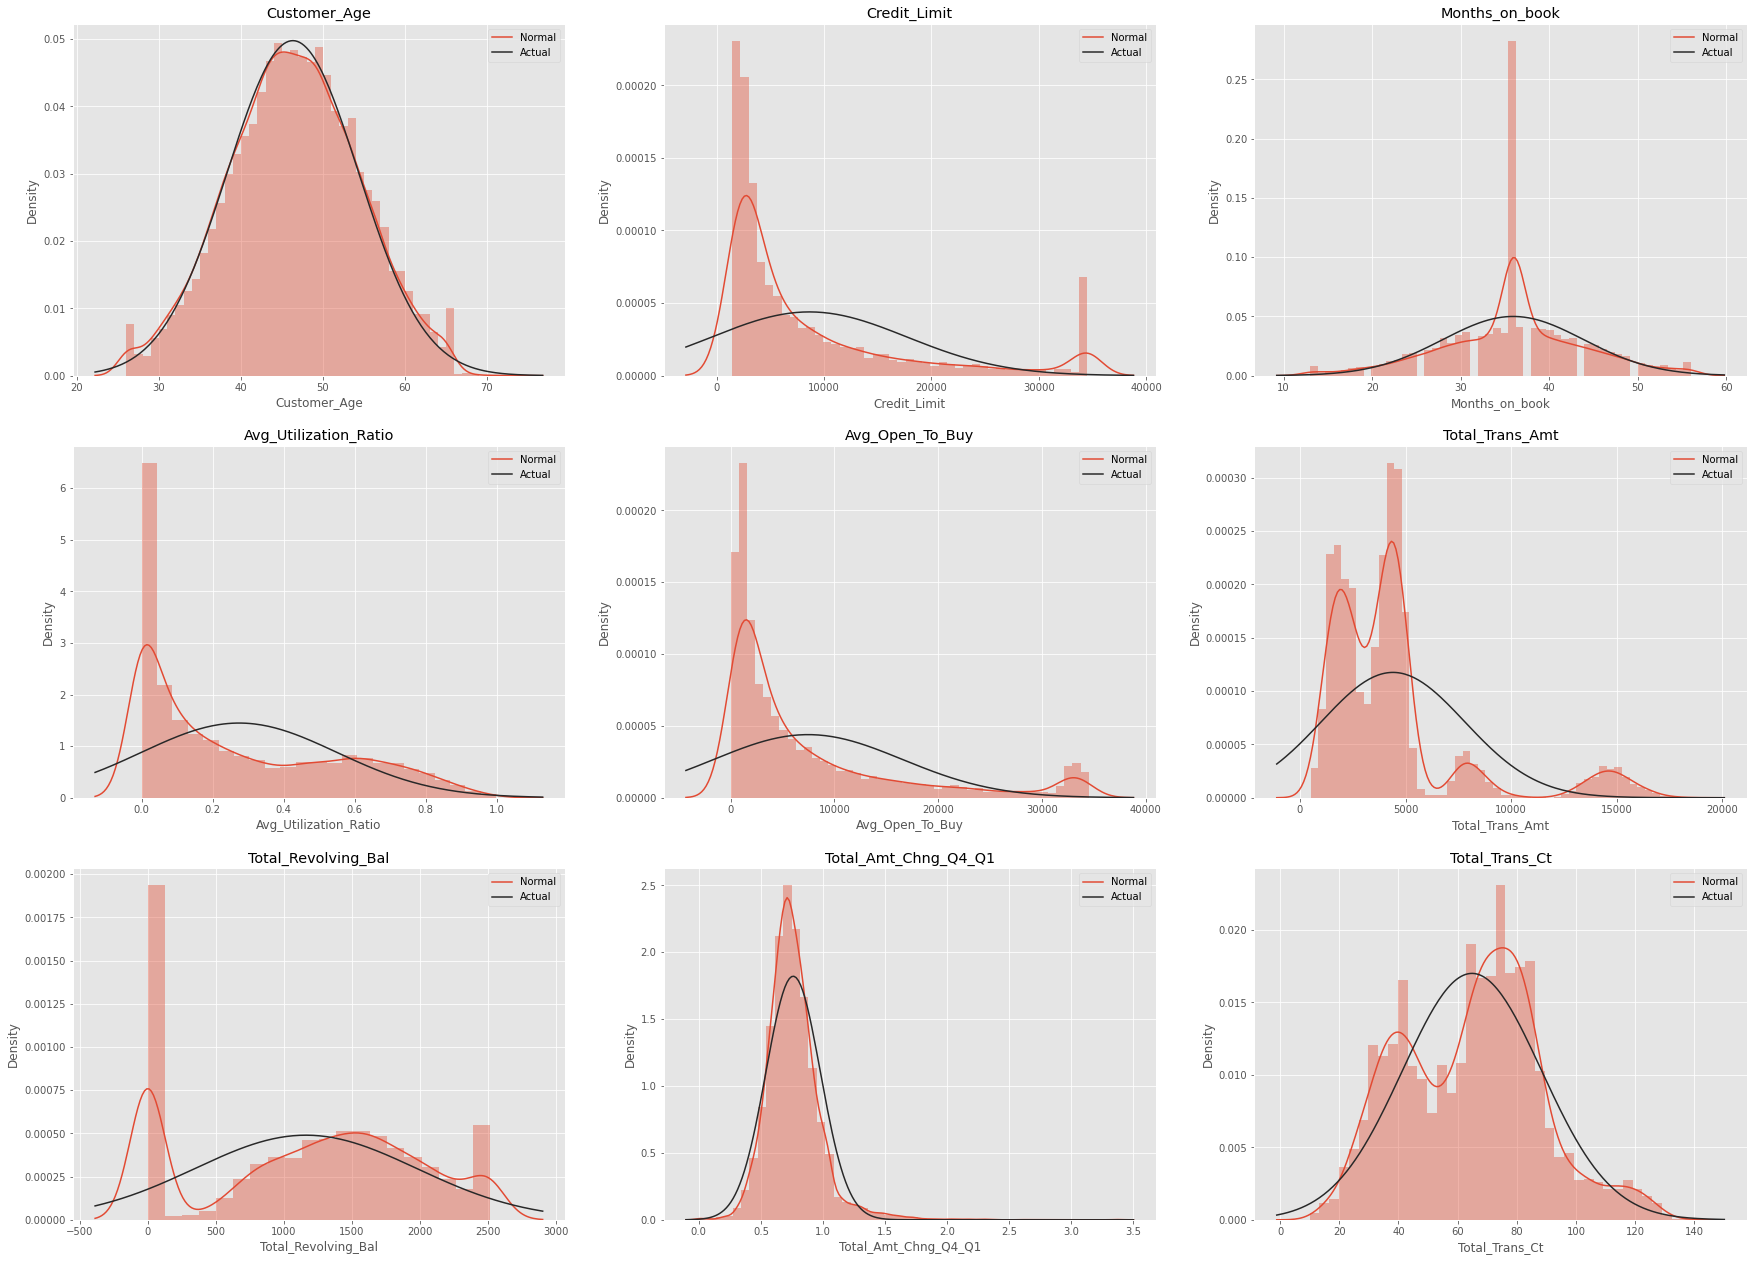

In [289]:
numerical=['Customer_Age','Credit_Limit','Months_on_book','Avg_Utilization_Ratio','Avg_Open_To_Buy','Total_Trans_Amt',
            'Total_Revolving_Bal','Total_Amt_Chng_Q4_Q1','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1']
fig,ax= plt.subplots(len(numerical)//3,3,figsize=(30,22))

index=0
for i in range(len(numerical)//3):
    for j in range(3):
        sns.distplot(dataframe.loc[:,numerical[index]],hist=True,fit=norm,kde=True,ax=ax[i][j])
        ax[i][j].set_title(numerical[index])
        ax[i][j].legend(labels=["Normal","Actual"])
        index+=1

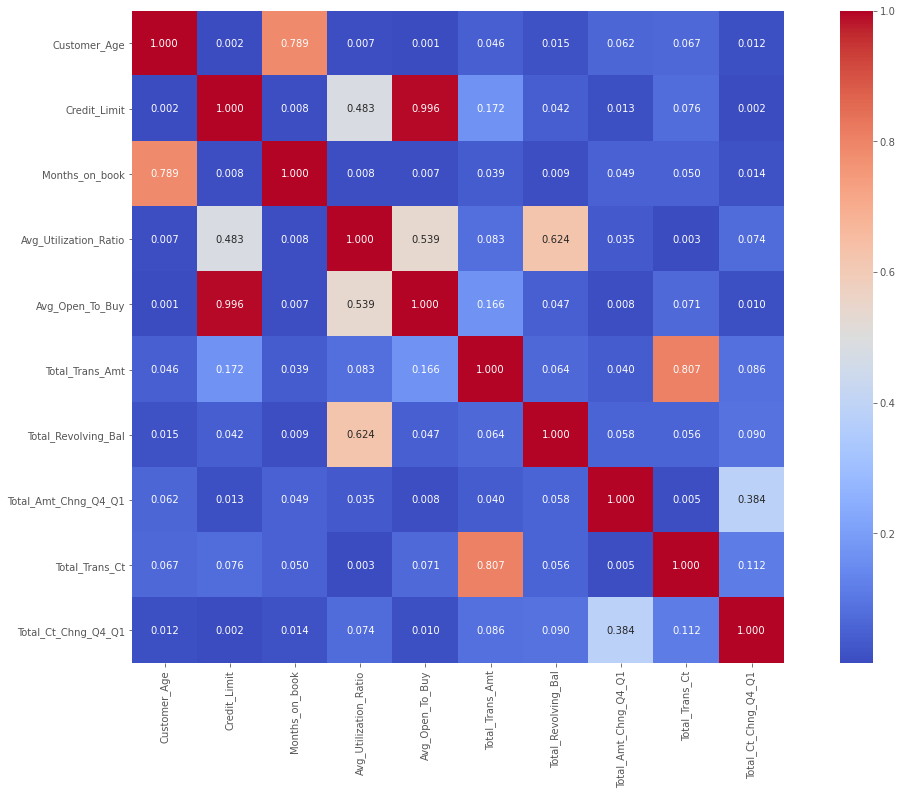

In [290]:
corr_data=dataframe.loc[:,numerical].corr()

plt.figure(figsize=(20,12))
sns.heatmap(corr_data.abs(),annot=True,fmt=".3f",cmap="coolwarm",square=True)
plt.show()

Generally features do not have a strong correlation between each others. This does not mean the features are not correlated. Correlation matrix usually we can only see the linear relationship between the features. Maybe the features are correlated quadratic or n-degree relationship between them.

## Categorical Data to Numeric Data  

We need to convert the categorical data to numerical data, as machine learning algorithms need numerical data

In [291]:
new_df=dataframe.copy()

le_attri=LabelEncoder()

le_attri.fit(new_df['Attrition_Flag'])
new_df['Attrition_Flag']=le_attri.transform(new_df['Attrition_Flag'])

le_gen=LabelEncoder()
le_gen.fit(new_df['Gender'])
new_df["Gender"]=le_gen.transform(new_df["Gender"])

le_inc=LabelEncoder()
le_inc.fit(new_df["Income_Category"])
new_df["Income_Category"]=le_inc.transform(new_df["Income_Category"])

le_edu=LabelEncoder()
le_edu.fit(new_df["Education_Level"])
new_df["Education_Level"]=le_edu.transform(new_df["Education_Level"])

le_mari=LabelEncoder()
le_mari.fit(new_df["Marital_Status"])
new_df["Marital_Status"]=le_mari.transform(new_df["Marital_Status"])

le_card=LabelEncoder()
le_card.fit(new_df["Card_Category"])
new_df["Card_Category"]=le_card.transform(new_df["Card_Category"])

In [292]:
new_df.sample(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
7883,1,51,1,1,2,2,3,0,39,1,1,3,7562.0,1080,6482.0,0.561,5010,85,0.700,0.143
2931,1,30,0,0,2,0,4,0,17,4,1,3,4704.0,0,4704.0,1.177,3294,87,0.891,0.000
4632,1,42,1,3,0,2,3,3,26,3,2,2,34516.0,904,33612.0,0.726,3910,68,0.659,0.026
5091,0,53,0,0,2,2,4,0,40,4,1,4,1438.3,0,1438.3,0.503,2014,53,0.472,0.000
812,1,44,1,3,2,1,1,0,27,4,2,3,10747.0,1603,9144.0,0.471,1340,25,0.923,0.149


In [293]:
display(new_df.describe())
display(new_df.info())

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.839340,46.325960,0.470919,2.346203,3.096574,1.463415,2.863928,0.179816,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,0.367235,8.016814,0.499178,1.298908,1.834812,0.737808,1.504700,0.693039,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,1.000000,41.000000,0.000000,1.000000,2.000000,1.000000,2.000000,0.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,1.000000,46.000000,0.000000,2.000000,3.000000,1.000000,3.000000,0.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,1.000000,52.000000,1.000000,3.000000,5.000000,2.000000,4.000000,0.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,1.000000,73.000000,1.000000,5.000000,6.000000,3.000000,5.000000,3.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int32  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int32  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  int32  
 5   Marital_Status            10127 non-null  int32  
 6   Income_Category           10127 non-null  int32  
 7   Card_Category             10127 non-null  int32  
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

None

## Modelling

In [294]:
m_logreg=LogisticRegression()

m_gbc=GradientBoostingClassifier(random_state=14)

m_rfc=RandomForestClassifier(criterion='gini', n_estimators=999, max_depth=4, random_state=14)

m_lgb=lgb.LGBMClassifier(num_iterations=550, learning_rate=0.01055,max_depth=3, random_state=14)

m_xgb=xgb.XGBClassifier(n_estimators=2250,max_depth=2, random_state=14)

m_gnb=GaussianNB()

m_mlpc=MLPClassifier(random_state=14)

m_svc= SVC(probability= True)

In [307]:
def report (X,y,models):
    X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=320)
    for model in models:
        current_model=model.__class__.__name__
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        print(current_model)
        print('Classification Report: ')
        print(classification_report(y_test, y_pred))

In [308]:
report(X,y,models)

LogisticRegression
Classification Report: 
              precision    recall  f1-score   support

           0       0.67      0.42      0.52       409
           1       0.90      0.96      0.93      2123

    accuracy                           0.87      2532
   macro avg       0.78      0.69      0.72      2532
weighted avg       0.86      0.87      0.86      2532

GradientBoostingClassifier
Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       409
           1       0.97      0.99      0.98      2123

    accuracy                           0.96      2532
   macro avg       0.95      0.91      0.93      2532
weighted avg       0.96      0.96      0.96      2532

RandomForestClassifier
Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.51      0.64       409
           1       0.91      0.98      0.95      2123

    accuracy                           0.

In [146]:
def estimates(X,y,models, cv):
    train_acc_dict=dict()
    test_acc_dict=dict()
    time_dict={}
    imp_features={}
    for model in models:
        current_model=model.__class__.__name__
        cv_results=cross_validate(model,X,y,cv=cv,return_train_score=True,scoring="accuracy")
        
        train_acc_dict[current_model]=cv_results['train_score'].mean()
        test_acc_dict[current_model]=cv_results["test_score"].mean()
        time_dict[current_model]=cv_results["fit_time"].mean()
        try:
            imp_features[current_model]= pd.DataFrame(sorted(zip(model.feature_importances_, X.columns)),
                                                      columns=['Value', 'Feature'])
        except:
            pass
    return train_acc_dict,test_acc_dict,time_dict,imp_features

In [200]:
cv= StratifiedKFold (11, shuffle=True , random_state=14)

models=[m_logreg, m_gbc, m_rfc, m_lgb, m_xgb, m_gnb, m_mlpc, m_svc]

X=new_df.drop("Attrition_Flag",axis=1)
y=new_df["Attrition_Flag"]

train_acc_dict, test_acc_dict, time_dict,imp_features = estimates(X, y, models, cv)

[22:52:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:52:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:52:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:52:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

## Model Results

Now that we have looked into the various models, lets see the training data accuracy, test data accuracy, time taken and the features important for modeling. Note: Feature Importance is just for features that have feature_importance as a parameter 

In [117]:
# training accuracy

for key in train_acc_dict.keys():
    print('{} - {:.1f}%'.format(key, train_acc_dict[key]*100))

LogisticRegression - 87.9%
GradientBoostingClassifier - 97.5%
RandomForestClassifier - 91.3%
LGBMClassifier - 96.4%
XGBClassifier - 100.0%
GaussianNB - 89.5%
MLPClassifier - 85.9%
SVC - 83.9%


In [118]:
# testing accuracy

for key in test_acc_dict.keys():
    print('{} - {:.1f}%'.format(key,test_acc_dict[key]*100))

LogisticRegression - 88.1%
GradientBoostingClassifier - 96.6%
RandomForestClassifier - 91.0%
LGBMClassifier - 95.8%
XGBClassifier - 97.2%
GaussianNB - 89.4%
MLPClassifier - 86.0%
SVC - 83.9%


In [133]:
def results_plot(result_1, result_2=None,ylabel_1="Score",ylabel_2="Score",title=None):
    first_df=pd.DataFrame({"Model":list(result_1.keys()),ylabel_1:list(result_1.values())})
    if ylabel_2!=None:
        second_df=pd.DataFrame({"Model":list(result_2.keys()),ylabel_2:list(result_2.values())})
    
        first_df=first_df.sort_values(by=ylabel_1,ascending=False)
        second_df=second_df.sort_values(by=ylabel_2,ascending=False)
    
        fig,ax=plt.subplots(1,2,figsize=(18,9),constrained_layout=True)
    
        for i in range(2):
            for item in ax[i].get_xticklabels():
                item.set_rotation(45)
            
        sns.barplot('Model',ylabel_1,data=first_df,ax=ax[0])
        sns.barplot('Model',ylabel_2,data=second_df,ax=ax[1])
    else:
        plt.figure(figsize=(15,10))
        plt.title(title)
        plt.xlabel("Model")
        plt.ylabel(ylabel_1)
        plt.plot(first_df["Model"],first_df[ylabel_1],"o-",color="r")
        plt.xticks(rotation=45)
        plt.show()

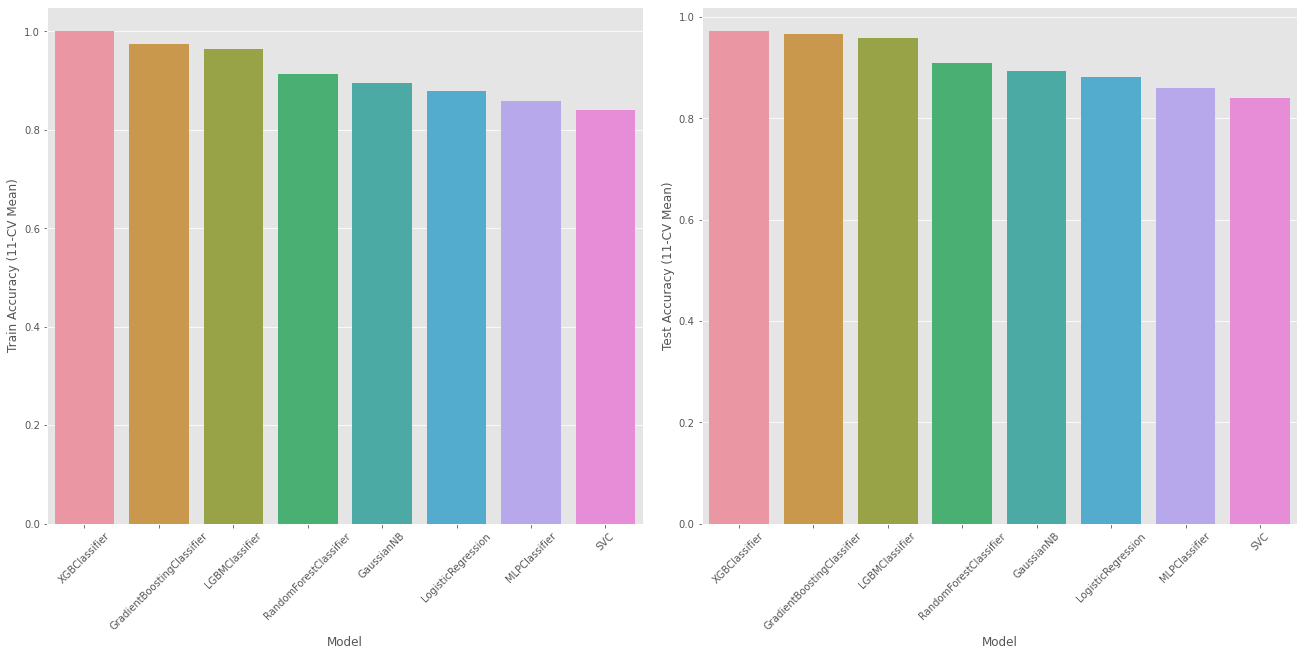

In [134]:
results_plot(train_acc_dict,test_acc_dict,'Train Accuracy (11-CV Mean)', 'Test Accuracy (11-CV Mean)')

In [130]:
# Fitting time 

for key in time_dict.keys():
    print('{} - {:.1f}secs'.format(key,time_dict[key]))

LogisticRegression - 0.1secs
GradientBoostingClassifier - 1.7secs
RandomForestClassifier - 4.5secs
LGBMClassifier - 0.2secs
XGBClassifier - 3.9secs
GaussianNB - 0.0secs
MLPClassifier - 1.6secs
SVC - 7.1secs


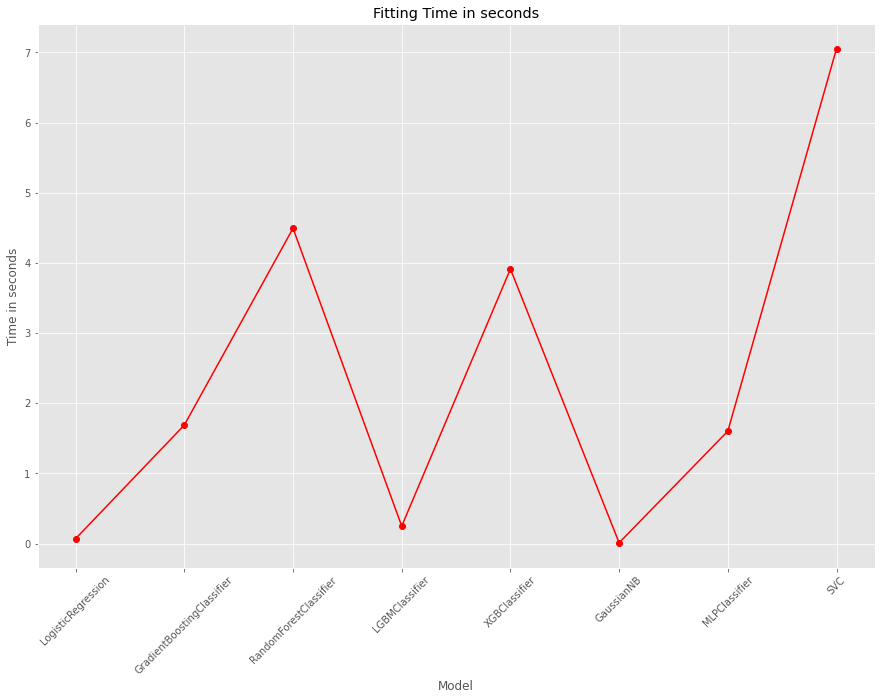

In [135]:
results_plot(time_dict,None,ylabel_1="Time in seconds",ylabel_2=None,title="Fitting Time in seconds")

In [180]:
def plot_imp_features(imp_features):
    
    fig, axes = plt.subplots(2, -(-len(imp_features) // 2), figsize=(23, 12))

    for ax, key in zip(axes.flatten(),imp_features.keys()):
        importance_features=pd.DataFrame(imp_features[key])
        importance_features = importance_features.sort_values('Value', ascending=False)
        sns.barplot(y="Feature", x="Value", ax=ax,data=importance_features)
        current_model_name = key
        ax.set(title=f'{current_model_name} Feature Importances')
        ax.xaxis.set_major_locator(MaxNLocator(nbins=11))

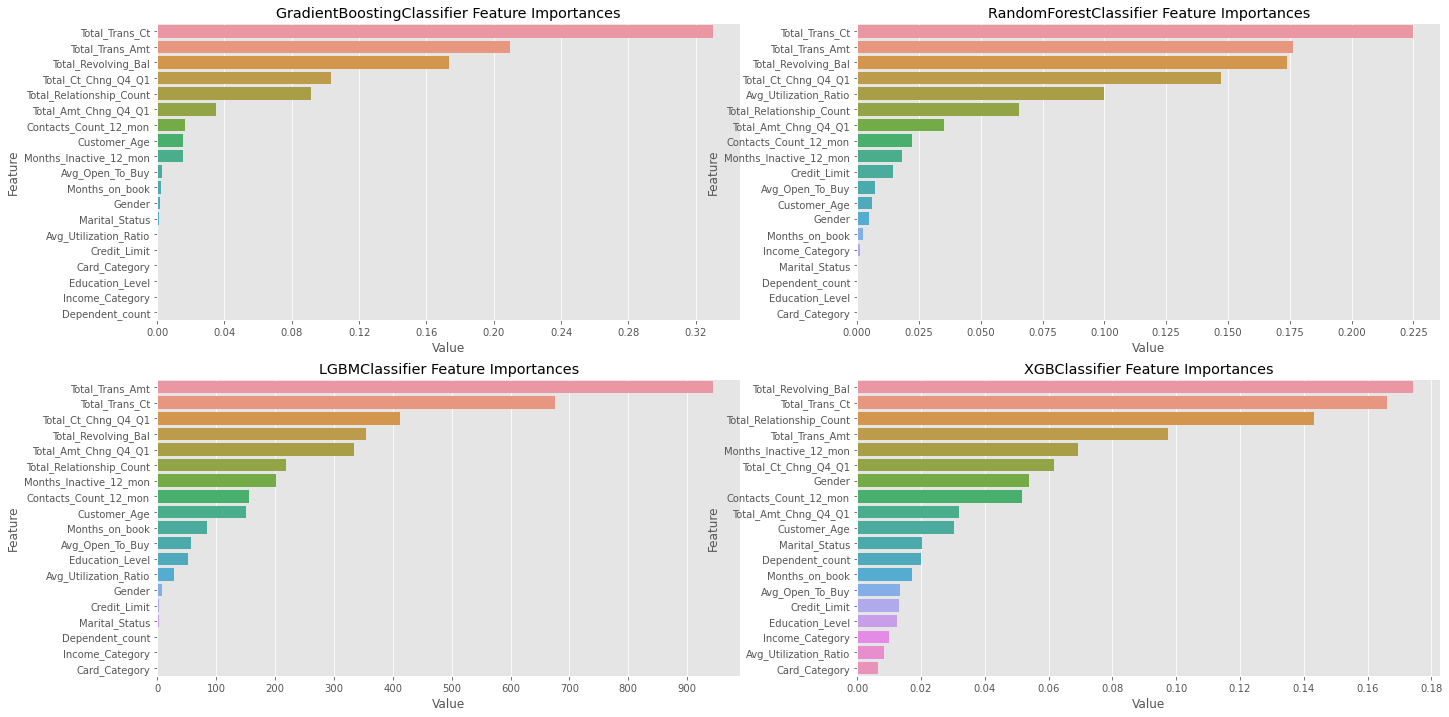

In [181]:
plot_imp_features(imp_features)

In [182]:
my_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('reducer', PCA(n_components=2)),
])

X_red = my_pipe.fit_transform(X)

In [184]:
train_acc_dict_red, test_acc_dict_red, time_dict_red,imp_features_red = estimates(X_red, y, models, cv)

[22:42:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:42:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:42:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:42:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [309]:
report(X_red,y,models)

LogisticRegression
Classification Report: 
              precision    recall  f1-score   support

           0       0.40      0.06      0.10       409
           1       0.84      0.98      0.91      2123

    accuracy                           0.83      2532
   macro avg       0.62      0.52      0.51      2532
weighted avg       0.77      0.83      0.78      2532

GradientBoostingClassifier
Classification Report: 
              precision    recall  f1-score   support

           0       0.58      0.16      0.25       409
           1       0.86      0.98      0.91      2123

    accuracy                           0.85      2532
   macro avg       0.72      0.57      0.58      2532
weighted avg       0.81      0.85      0.81      2532

RandomForestClassifier
Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       409
           1       0.84      1.00      0.91      2123

    accuracy                           0.

In [185]:
# Training accuracy
for key, value in train_acc_dict_red.items():
    print('{} - {:.1f}%'.format(key, value*100))

LogisticRegression - 83.7%
GradientBoostingClassifier - 85.8%
RandomForestClassifier - 84.0%
LGBMClassifier - 84.8%
XGBClassifier - 91.5%
GaussianNB - 83.9%
MLPClassifier - 84.1%
SVC - 83.9%


In [186]:
# Test accuracy
for key, value in test_acc_dict_red.items():
    print('{} - {:.1f}%'.format(key, value*100))

LogisticRegression - 83.7%
GradientBoostingClassifier - 84.5%
RandomForestClassifier - 83.9%
LGBMClassifier - 84.5%
XGBClassifier - 82.8%
GaussianNB - 83.9%
MLPClassifier - 84.0%
SVC - 83.9%


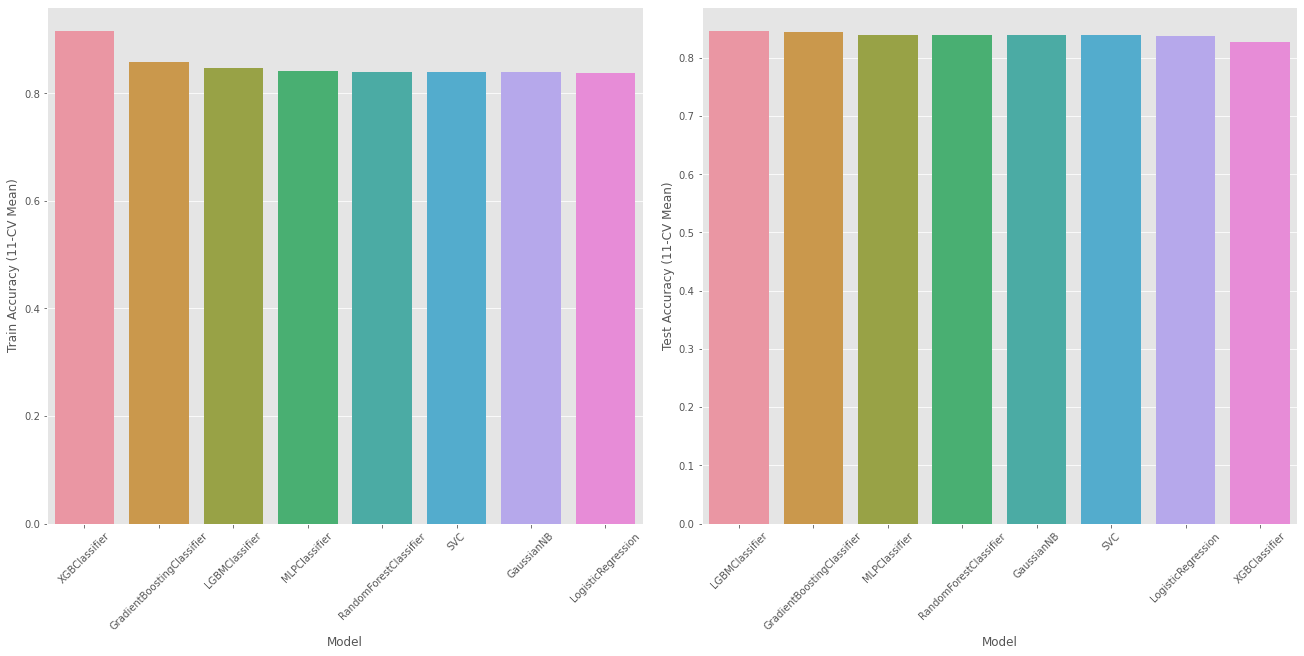

In [187]:
results_plot(train_acc_dict_red,test_acc_dict_red,'Train Accuracy (11-CV Mean)', 'Test Accuracy (11-CV Mean)')

In [188]:
for key in time_dict_red.keys():
    print('{} - {:.1f}secs'.format(key,time_dict[key]))

LogisticRegression - 0.1secs
GradientBoostingClassifier - 1.7secs
RandomForestClassifier - 4.5secs
LGBMClassifier - 0.2secs
XGBClassifier - 3.8secs
GaussianNB - 0.0secs
MLPClassifier - 1.5secs
SVC - 6.7secs


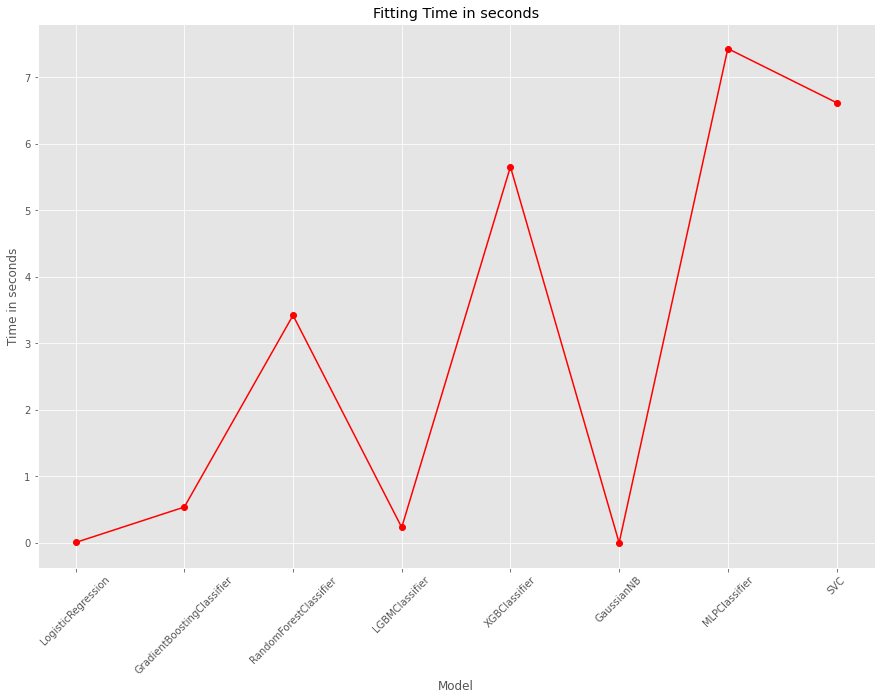

In [189]:
results_plot(time_dict_red,None,ylabel_1="Time in seconds",ylabel_2=None,title="Fitting Time in seconds")

In [311]:
from imblearn.over_sampling import SMOTE
seed =100
k=2
sm=SMOTE(sampling_strategy="auto",k_neighbors=k,random_state=seed)
X_res,y_res=sm.fit_resample(X,y)
print(X_res.shape)

(17000, 19)


In [298]:
train_acc_dict_res, test_acc_dict_res, time_dict_res,imp_features_res = estimates(X_res, y_res, models, cv)

[23:57:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:57:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:58:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:58:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [310]:
report(X_res,y_res,models)

LogisticRegression
Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      2100
           1       0.79      0.80      0.79      2150

    accuracy                           0.79      4250
   macro avg       0.79      0.79      0.79      4250
weighted avg       0.79      0.79      0.79      4250

GradientBoostingClassifier
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2100
           1       0.97      0.96      0.97      2150

    accuracy                           0.97      4250
   macro avg       0.97      0.97      0.97      4250
weighted avg       0.97      0.97      0.97      4250

RandomForestClassifier
Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      2100
           1       0.92      0.90      0.91      2150

    accuracy                           0.

In [299]:
# Training accuracy
for key, value in train_acc_dict_res.items():
    print('{} - {:.1f}%'.format(key, value*100))

LogisticRegression - 81.0%
GradientBoostingClassifier - 97.4%
RandomForestClassifier - 91.2%
LGBMClassifier - 95.9%
XGBClassifier - 100.0%
GaussianNB - 80.7%
MLPClassifier - 79.5%
SVC - 74.2%


In [300]:
# Test accuracy
for key, value in test_acc_dict_res.items():
    print('{} - {:.1f}%'.format(key, value*100))

LogisticRegression - 80.8%
GradientBoostingClassifier - 96.9%
RandomForestClassifier - 90.8%
LGBMClassifier - 95.5%
XGBClassifier - 98.4%
GaussianNB - 80.7%
MLPClassifier - 79.1%
SVC - 74.1%


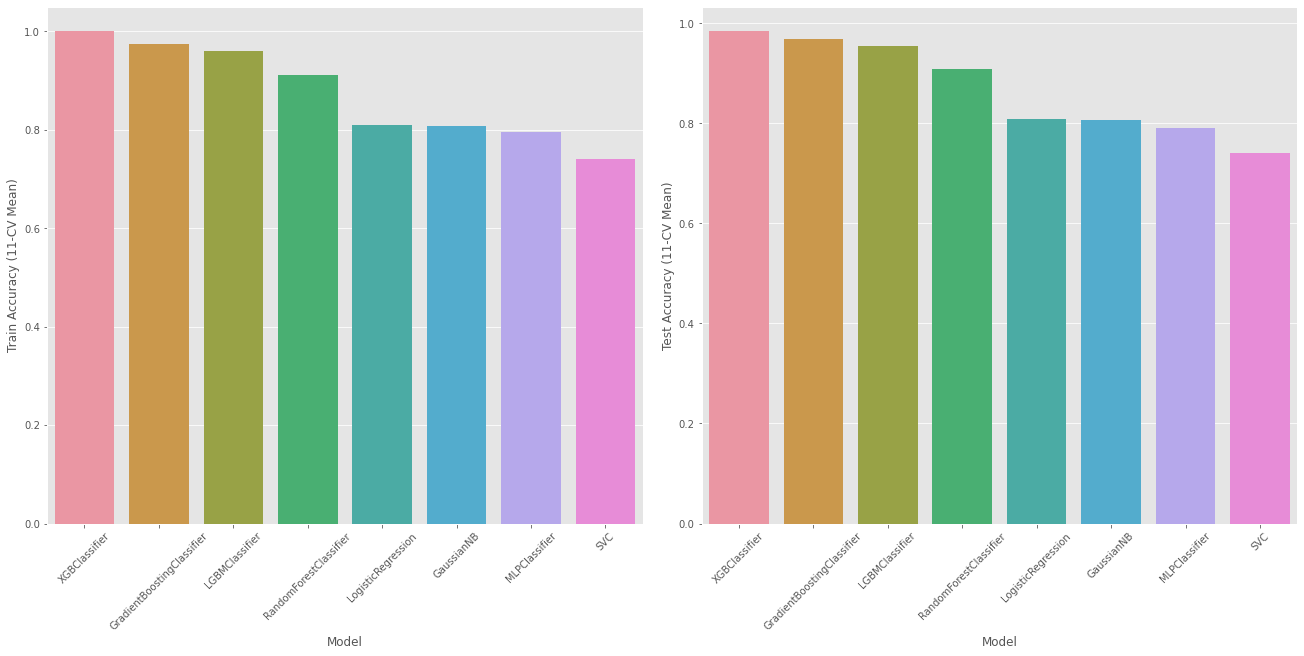

In [301]:
results_plot(train_acc_dict_res,test_acc_dict_res,'Train Accuracy (11-CV Mean)', 'Test Accuracy (11-CV Mean)')

In [305]:
for key in time_dict_res.keys():
    print('{} - {:.1f}secs'.format(key,time_dict_res[key]))

LogisticRegression - 0.1secs
GradientBoostingClassifier - 2.9secs
RandomForestClassifier - 7.2secs
LGBMClassifier - 0.5secs
XGBClassifier - 10.2secs
GaussianNB - 0.0secs
MLPClassifier - 3.2secs
SVC - 39.3secs


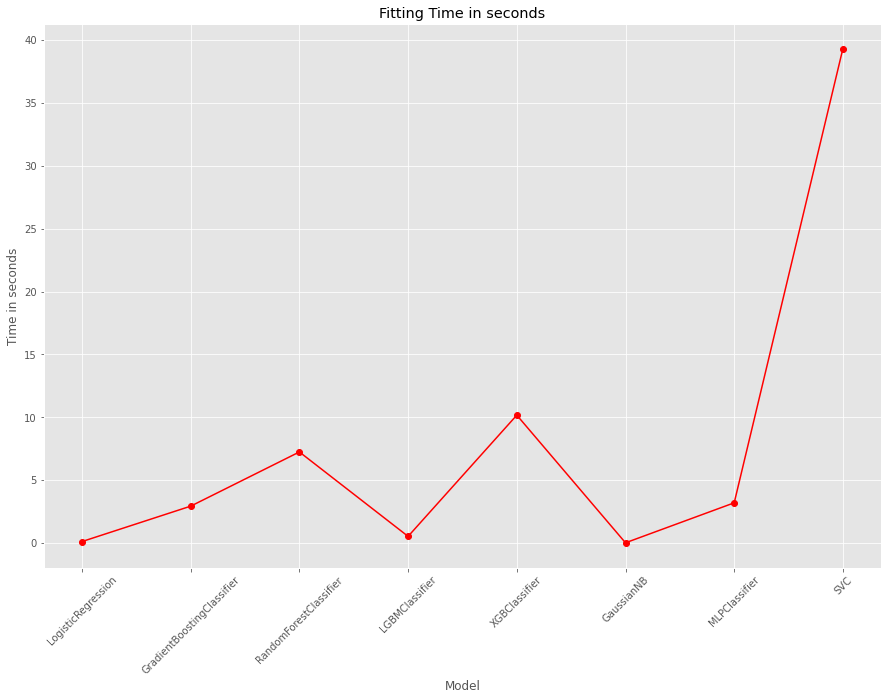

In [303]:
results_plot(time_dict_res,None,ylabel_1="Time in seconds",ylabel_2=None,title="Fitting Time in seconds")

Using Smote, I even increased the accuracy of the model. But now the time taken to the train the model has gone considerably high, since the number of samples has increased from 10127 to 17000. This synthetic datapoints have helped in generating an excellent model. 